In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
print(accuracy_list)

[]


In [5]:
path_clas = Path('/home/ubuntu/data/autopsy/no_preprocessing')
path_lm = Path('/home/ubuntu/data/autopsy/no_preprocessing')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-7

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])


In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')


learn.freeze()

In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


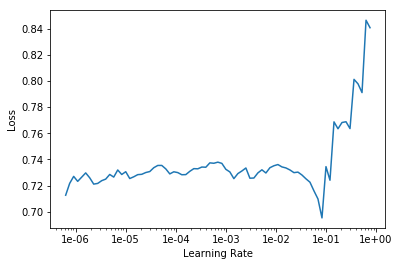

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.716686    0.675426    0.579399  (00:12)
2      0.704337    0.731718    0.519313  (00:11)
3      0.685354    0.658039    0.622318  (00:11)
4      0.661967    0.676280    0.609442  (00:11)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 09:16
epoch  train_loss  valid_loss  accuracy
1      0.672805    0.662325    0.660944  (00:24)
2      0.653434    0.692223    0.596566  (00:25)
3      0.630867    0.688594    0.583691  (00:29)
4      0.624648    0.623595    0.656652  (00:25)
5      0.609127    0.690787    0.592275  (00:26)
6      0.598310    0.628519    0.686695  (00:28)
7      0.583799    0.647819    0.656652  (00:28)
8      0.545649    0.568584    0.751073  (00:29)
9      0.532260    0.543137    0.776824  (00:27)
10     0.524623    0.626036    0.660944  (00:28)
11     0.515253    0.496724    0.802575  (00:30)
12     0.531182    0.459496    0.802575  (00:26)
13     0.485319    0.509598    0.789700  (00:30)
14     0.490322    0.469319    0.819743  (00:26)
15     0.470286    0.440277    0.815451  (00:29)
16     0.472017    0.414623    0.828326  (00:24)
17     0.444195    0.490324    0.781116  (00:31)
18     0.418701    0.486424    0.789700  (00:29)
19     0.419635    0.478290    0.802575  (00:27)
20     0.42

In [12]:
learn.validate()

[0.42493087, tensor(0.8541)]

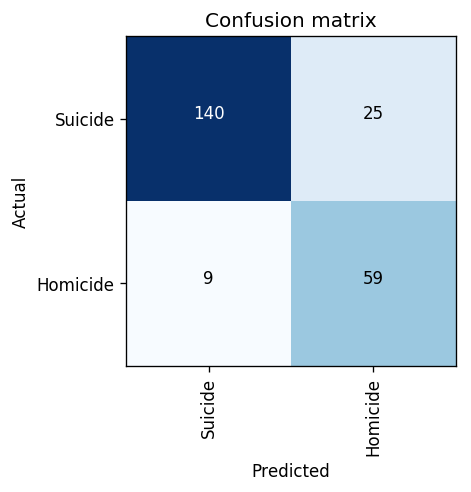

In [13]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

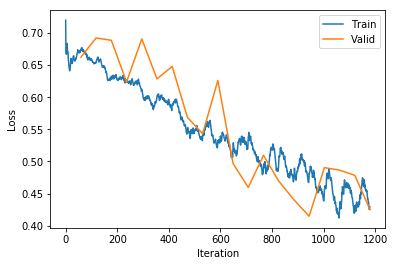

In [14]:
learn.recorder.plot_losses()

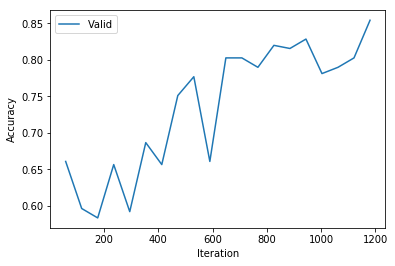

In [15]:
learn.recorder.plot_metrics()

In [16]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


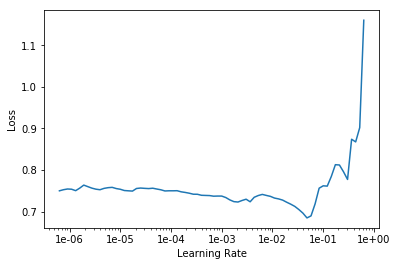

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      0.698835    0.616813    0.678112  (00:12)
2      0.679902    0.659992    0.652360  (00:12)
3      0.671385    0.690474    0.626609  (00:10)
4      0.656014    0.682977    0.600858  (00:11)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 09:35
epoch  train_loss  valid_loss  accuracy
1      0.622003    0.643527    0.665236  (00:31)
2      0.602377    0.613013    0.690987  (00:29)
3      0.587626    0.600528    0.712446  (00:31)
4      0.570902    0.545288    0.742489  (00:29)
5      0.561107    0.472159    0.824034  (00:27)
6      0.569825    0.550117    0.738197  (00:27)
7      0.549199    0.585554    0.708154  (00:32)
8      0.554360    0.450010    0.819743  (00:25)
9      0.525437    0.429527    0.811159  (00:28)
10     0.508509    0.479785    0.811159  (00:31)
11     0.522443    0.470192    0.798283  (00:26)
12     0.491764    0.536536    0.742489  (00:29)
13     0.497124    0.454648    0.802575  (00:28)
14     0.507461    0.424293    0.811159  (00:24)
15     0.469206    0.460254    0.793991  (00:30)
16     0.418449    0.392434    0.836910  (00:30)
17     0.417918    0.413095    0.824034  (00:28)
18     0.433695    0.456340    0.798283  (00:26)
19     0.448196    0.354951    0.854077  (00:28)
20     0.42

In [21]:
learn.validate()

[0.39442855, tensor(0.8326)]

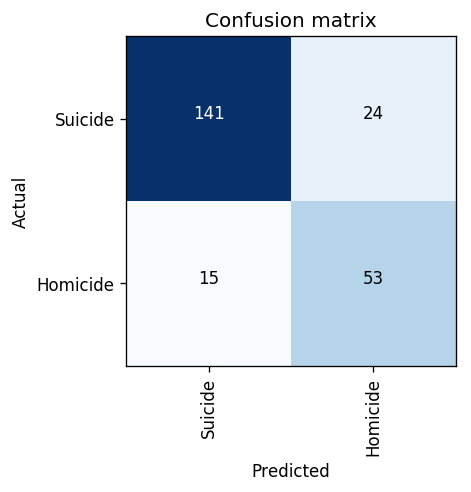

In [22]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

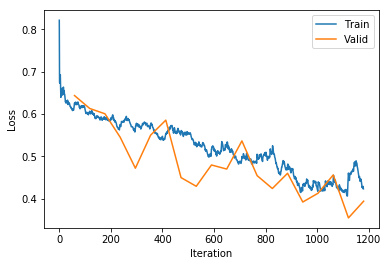

In [23]:
learn.recorder.plot_losses()

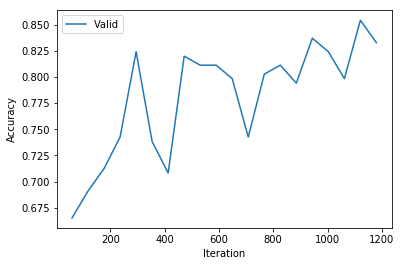

In [24]:
learn.recorder.plot_metrics()

In [25]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')

learn.freeze()

In [26]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


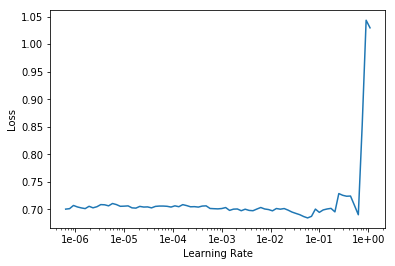

In [27]:
learn.recorder.plot()

In [28]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:48
epoch  train_loss  valid_loss  accuracy
1      0.687586    0.579735    0.751073  (00:11)
2      0.673722    0.587404    0.712446  (00:11)
3      0.637696    0.606147    0.673820  (00:12)
4      0.626498    0.568122    0.759657  (00:12)



In [29]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy
1,0.625151,0.602282,0.686695
2,0.621231,0.556668,0.755365
3,0.599770,0.603233,0.716738
4,0.579321,0.574467,0.733906
5,0.570982,0.576186,0.729614
6,0.567802,0.578421,0.699571
7,0.558214,0.529648,0.785408
8,0.558636,0.511462,0.785408
9,0.530641,0.514991,0.781116


KeyboardInterrupt: 

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
print(accuracy_list)

In [ ]:
print(sum(accuracy_list)/len(accuracy_list))

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_only_pretrained_no_preprocessing')

learn.freeze()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [ ]:
import torch

torch.cuda.empty_cache()